In [79]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import kagglehub
np.random.seed(0)
import random
from sklearn.model_selection import train_test_split

In [83]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2), (0,0)), 'constant')
X_test = np.pad(X_test, ((0, 0), (2, 2), (2, 2), (0,0)), 'constant')

In [84]:
image_width = X_train[0].shape[0]
image_height = X_train[0].shape[1]
num_channels = 1

seed = 98
np.random.seed(seed)
tf.random.set_seed(seed)

In [89]:
batch_size = 100
evaluation_size = 500
epochs = 300
eval_every = 5

In [90]:
X_train = X_train / 255
X_test = X_test / 255

In [93]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(image_width, image_height, num_channels), name='Input')

conv1 = tf.keras.layers.Conv2D(filters= 6,
                               kernel_size= 5,
                               padding='VALID',
                               activation='relu',
                               name='C1')(input_data)

max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=2,
                                         strides=2, 
                                         padding='SAME',
                                         name='S1')(conv1)

conv2 = tf.keras.layers.Conv2D(filters= 16,
                               kernel_size= 5,
                               padding='VALID',
                               strides = 1,
                               activation='relu',
                               name='C3')(max_pool1)

max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=2,
                                         strides=2,
                                         padding='SAME',
                                         name='S4')(conv2)

flatten = tf.keras.layers.Flatten(name='Flatten')(max_pool2)

fully_connected_1 = tf.keras.layers.Dense(units= 120,
                                          activation= 'relu',
                                          name='F5')(flatten)

fully_connected_2 = tf.keras.layers.Dense(units= 84,
                                          activation= 'relu',
                                          name='F6')(fully_connected_1)

final_model_output = tf.keras.layers.Dense(units= 10,
                                           activation= 'softmax',
                                           name='OUTPUT')(fully_connected_2)

model = tf.keras.Model(inputs= input_data, 
                       outputs= final_model_output)

In [94]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [96]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32, 32, 1)]       0         
                                                                 
 C1 (Conv2D)                 (None, 28, 28, 6)         156       
                                                                 
 S1 (MaxPooling2D)           (None, 14, 14, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 S4 (MaxPooling2D)           (None, 5, 5, 16)          0         
                                                                 
 Flatten (Flatten)           (None, 400)               0         
                                                                 
 F5 (Dense)                  (None, 120)               48120 

In [105]:
train_loss = []
train_acc = []
test_acc = []
for i in range(epochs):
    rand_index = np.random.choice(len(X_train), size=batch_size)
    rand_X = X_train[rand_index]
    rand_y = y_train[rand_index]
    
    history_train = model.train_on_batch(rand_X, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(X_test), size=evaluation_size)
        eval_X = X_test[eval_index]
        eval_y = y_test[eval_index]
        
        history_eval = model.evaluate(eval_X, eval_y)
        
        train_loss.append(history_train[0])
        train_acc.append(history_train[1])
        test_acc.append(history_eval[1])
        acc_and_loss = [(1+1), history_train[0], history_train[1], history_eval[1]]
        acc_and_loss = [np.round(x, 2) for x in acc_and_loss]
        print('Epoch # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

16/16 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9960
Epoch # 2. Train Loss: 0.07. Train Acc (Test Acc): 0.97 (1.00)
16/16 [==============================] - 0s 5ms/step - loss: 0.0921 - accuracy: 0.9680
Epoch # 2. Train Loss: 0.10. Train Acc (Test Acc): 0.98 (0.97)
16/16 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9840
Epoch # 2. Train Loss: 0.05. Train Acc (Test Acc): 0.99 (0.98)
16/16 [==============================] - 0s 4ms/step - loss: 0.0628 - accuracy: 0.9800
Epoch # 2. Train Loss: 0.05. Train Acc (Test Acc): 0.98 (0.98)
16/16 [==============================] - 0s 5ms/step - loss: 0.0753 - accuracy: 0.9700
Epoch # 2. Train Loss: 0.07. Train Acc (Test Acc): 0.97 (0.97)
16/16 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.9700
Epoch # 2. Train Loss: 0.04. Train Acc (Test Acc): 0.99 (0.97)
16/16 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9820
Epoch # 2. Tr

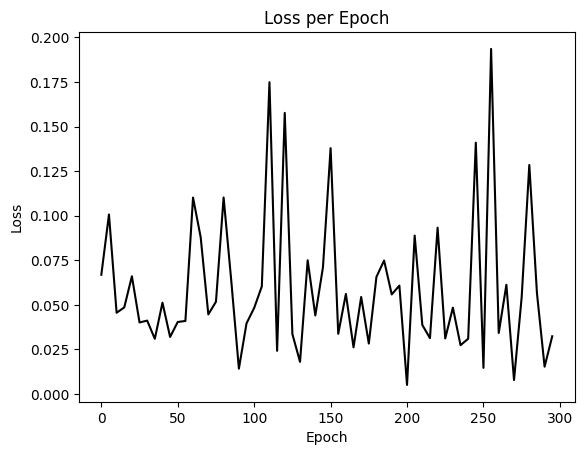

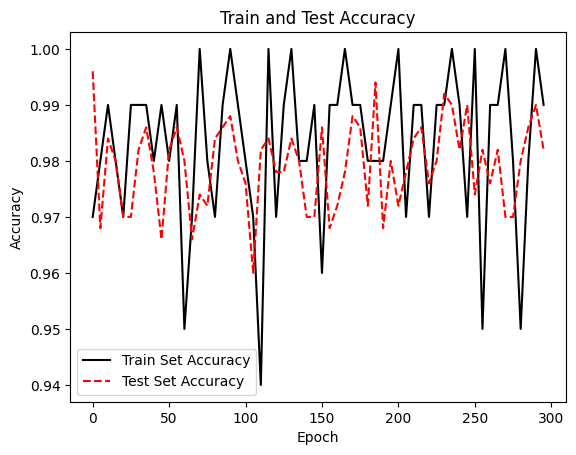

In [106]:
eval_indices = range(0, epochs, eval_every)

plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()

1/1 [==============================] - 0s 18ms/step


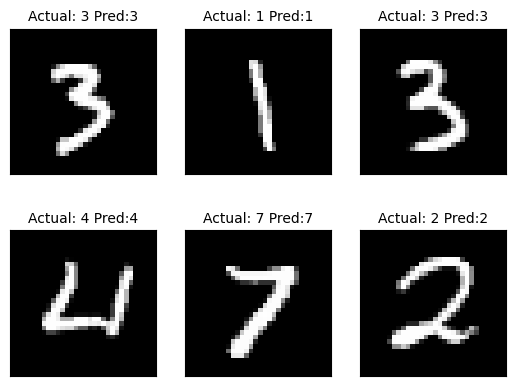

In [110]:
actuals = y_test[30:36]
preds = model.predict(X_test[30:36])
predictions = np.argmax(preds, axis=1)
images = np.squeeze(X_test[30:36])

Nrows = 2
Ncols = 3

for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [32, 32]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred:' + str(predictions[i]), fontsize = 10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

In [111]:
model.save('mnist.h5')

/Users/coding/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 4ms/step


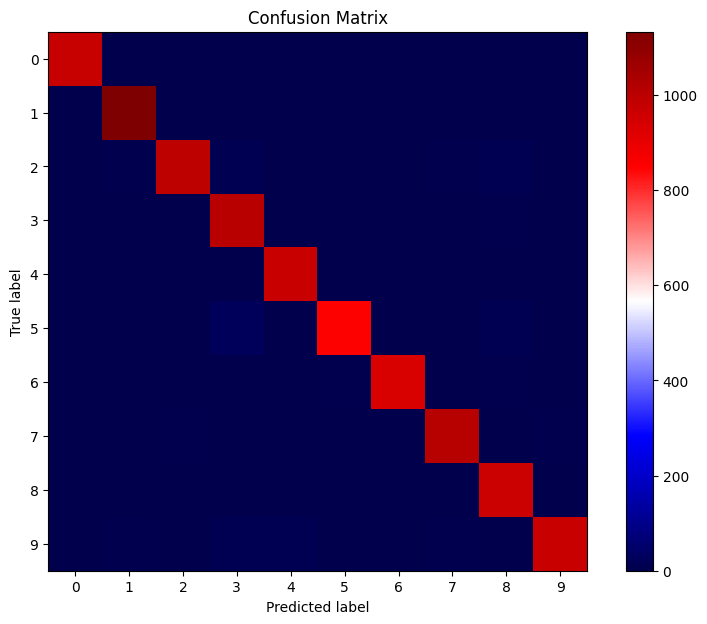

In [118]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.seismic)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()